<a href="https://colab.research.google.com/github/jvplopes/DSNP-modulo_3/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Panorama da COVID-19 | Brasil
*by [João Lopes](https://www.linkedin.com/in/joao-vitor-p-lopes/)*

1.png

##Covid-19
Segundo a [Organização Mundial da Saúde - OMS](https://www.who.int/health-topics/coronavirus#tab=tab_1) a COVID-19 é uma doença infecsiosa causada pelo vírus SARS-CoV-2.

A maioria das pessoas infectadas com o vírus apresentará doença respiratória leve a moderada e se recuperará sem precisar de tratamento especial.
No entanto, alguns ficarão gravemente doentes e exigirão tratamento médico especial. Os idosos e aqueles com condições médicas subjacentes, como doenças cardiovasculares, diabetes, doenças respiratórias crônicas ou câncer, são mais propensos a desenvolver doenças graves. 
Qualquer pessoa pode ficar doente com COVID-19 e ficar gravemente doente ou morrer em qualquer idade.

**Propagação**

O vírus propaga-se de pessoa para pessoa por pequenas particulas líquidas.

O vírus pode se espalhar da boca ou nariz de uma pessoa infectada em pequenas partículas líquidas quando ela tosse, espirra, fala, canta ou respira. Essas partículas variam de gotículas respiratórias maiores a aerossóis menores. É importante praticar a etiqueta respiratória, por exemplo, tossindo com o cotovelo flexionado, e ficar em casa e isolar-se até se recuperar se não estiver se sentindo bem.

**Prevensão**

A melhor maneira de prevenir e retardar a transmissão é estar bem informado sobre a doença e como o vírus se espalha. Proteja-se a si e aos outros da infecção **mantendo-se a pelo menos 1 metro de distância dos outros**, **usando uma máscara** apropriadamente ajustada e **lavando as mãos**  ou esfregando-as com álcool com frequência. **Vacine-se** quando for a sua vez e siga as orientações locais.

**Pandemia**

No dia 11 de março de 2020, a OMS [declarou a COVID-19 como uma pandemia](https://news.un.org/pt/story/2020/03/1706881).

O que é uma pandemia?

Segundo a OMS, pandemia é a disseminação mundial de uma nova doença que se espalha por diferentes continentes com transmissão sustentada de pessoa para pessoa.

## Obtenção dos Dados

Os dados utilizados foram obtidos no site [Our World ind Data](https://ourworldindata.org/coronavirus). Os dados de mais de 200 países são atualizados diariamente, nesta análise o período temporal será até o dia 12/02/2022.

Os seguintes dados estão incluídos no *dataset*:
* Vacinação
* Testes
* Hospitalares & UTI
* Casos confirmados
* Mortes confirmadas
* Taxa de reprodução
* Ações governamentais
* Outras variáveis de interesse	

### Dicionário de Variáveis
O dataset possui 67 variáveis, mas somente essas serão utilizadas:

| Variável | Descrição |
| :-: | :-: |
| `iso_code` | Código do país em duas letras |
|`new_cases_smoothed` | Casos novos confirmados (7-dias suavizado) |
|`total_deaths` | Total de mortes atribuidas à COVID-19 |
|`new_deaths` | Novas mortes atribuidas à COVID-19 |
|`new_deaths_smoothed` | Mortes novas confirmados (7-dias suavizado) |
|`total_cases_per_million`| Total de casos por milhão de pessoas |
|`new_cases_per_million` | Casos novos por milhão de pessoas |
|`new_cases_smoothed_per_million` | Casos novos confirmados por milhão de pessoas (7-dias suavizado) |
|`total_deaths_per_million` | Total de mortes atribuidas à COVID-19 por milhão de pessoa |
|`new_deaths_per_million` | Novas mortes atribuidas à COVID-19 por milhão de pessoa |
|`new_deaths_smoothed_per_million` | Mortes novas confirmados por milhão de pessoas (7-dias suavizado) |
|`new_tests` | Testes novos |
|`total_tests` | Total de testes | 
|`total_tests_per_thousand` | Total de testes por milhar de pessoas |
|`new_tests_per_thousand` | Novos testes por milhar |
|`new_tests_smoothed` | Novos testes realizados (7-dias suavizado) |
|`new_tests_smoothed_per_thousand` | Novos testes realizados por milhar de pessoas (7-dias suavizado) |
|`tests_units` | Quantidade de locais de testagens |
|`total_vaccinations` | Total de vacinas |
|`people_vaccinated` | Pessoas vacinadas |
|`people_fully_vaccinated` | Pessoas que receberam as doses previstas pelo protocolo inicial |
|`new_vaccinations` | Novas vacinas administradas |
|`new_vaccinations_smoothed` | Novas vacinas administradas (7-dias suavizado) |
|`total_vaccinations_per_hundred` | Total de vacinas por milhar de pessoas |
|`people_vaccinated_per_hundred` | Pessoas vacinadas por milhar de pessoa |
|`people_fully_vaccinated_per_hundred` | Pessoas que receberam as doses previstas pelo protocolo inicial por milhar de pessoa |
|`new_vaccinations_smoothed_per_million` | Novas vacinas administradas por milhão de pessoa (7-dias suavizado) |
|`new_people_vaccinated_smoothed` | Novas pessoas vacinadas (7-dias suavizado) |
|`new_people_vaccinated_smoothed_per_hundred` | Novas pessoas vacinadas por milhar de pessoas(7-dias suavizado) |
|`population` | População | 

In [1]:
#Biblioteca extra
!pip install bar_chart_race -q
!pip install svgpath2mpl -q
!pip install dataframe_image -q

#Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import seaborn as sns
import bar_chart_race as bcr

     |████████████████████████████████| 156 kB 5.1 MB/s 
     |████████████████████████████████| 1.1 MB 8.4 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 271 kB 70.9 MB/s 
     |████████████████████████████████| 144 kB 42.9 MB/s 


In [26]:
### Importando os dados do COVID-19
df = pd.read_csv("/content/drive/MyDrive/owid-covid-data.csv")

## Análise Exploratória dos Dados

Nesta fase, será verificada algumas características do dataset: tamanho, tipos dos dados e dados ausentes.

###Tamanho
São 161.390 entradas e 67 variáveis

In [ ]:
entradas, variaveis = df.shape;
print("Entradas:\t{}".format(entradas))
print("Variáveis:\t{}\n".format(variaveis))

In [28]:
df.head()

iso_code continent  ... excess_mortality excess_mortality_cumulative_per_million
0      AFG      Asia  ...              NaN                                     NaN
1      AFG      Asia  ...              NaN                                     NaN
2      AFG      Asia  ...              NaN                                     NaN
3      AFG      Asia  ...              NaN                                     NaN
4      AFG      Asia  ...              NaN                                     NaN

[5 rows x 67 columns]

In [29]:

df.location.value_counts()


Mexico       774
Argentina    774
Peru         774
Thailand     771
Taiwan       759
            ... 
Tuvalu       179
Palau        175
Tokelau      114
Pitcairn      85
Niue          43
Name: location, Length: 238, dtype: int64

As entradas que não são países serão removidas.

In [30]:
# Remoção de entradas que não são países
excluidos = ['High income', 'Europe', 'Upper middle income', 'Asia', 
             'North America', 'European Union', 'Lower middle income',
             'South America', 'Oceania', 'Low income', 'International',
             'Africa']

df = df.drop(df.loc[df['location'].isin(excluidos)].index)

###Informações
A grande maiorias dos dados são do tipo float.

In [ ]:
# verificar os tipos das variáveis
df.info()

A variável `date` não está no formato de data.

In [32]:
#Moditifando a variável date
df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d").dt.date

###Dados ausentes
Muitas variáveis estão com mais de 90% de dados ausentes.

In [ ]:
round((df.isnull().sum() / entradas * 100).sort_values(ascending=False))

Algumas variáveis estão com valores nulos em excesso e/ou não são de interesse para essa análise, deste modo não serão mantidas no dataframe.

In [34]:
#Exclusão de algumas variáveis
df = df.drop(columns=['weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions_per_million', 'continent', 'reproduction_rate', 'aged_65_older', 'aged_70_older', 'extreme_poverty',
                      'weekly_hosp_admissions','excess_mortality','excess_mortality_cumulative_absolute','excess_mortality_cumulative', 'positive_rate', 'population_density', 'gdp_per_capita', 'cardiovasc_death_rate',
                      'total_boosters_per_hundred','total_boosters','excess_mortality_cumulative_per_million','icu_patients_per_million', 'tests_per_case', 'stringency_index', 'median_age',
                      'icu_patients','hosp_patients_per_million','hosp_patients','human_development_index', 'life_expectancy', 'hospital_beds_per_thousand', 'handwashing_facilities', 'male_smokers', 'female_smokers', 'diabetes_prevalence', 'cardiovasc_death_rate'])

In [ ]:
#Axibir as variáveis que foram mantidas
df.columns

##Progressão da COVID-19 no mundo

O *dataset* utilizado possui dados de 216 países.

Os primeiros casos foram registrados em dezembro de 2019 na China, cidade de Wuhan. Onde há um laboratório de pesquisas virais, [Instituto de Virologia de Wuhan](http://www.whiov.cas.cn/) e ,em 2019, a cidade foi sede da [7ª Edição dos Jogos Mundiais Militares](https://www.gov.br/pt-br/noticias/cultura-artes-historia-e-esportes/2019/10/brasil-encerra-sua-participacao-na-7a-edicao-dos-jogos-mundiais-militares), no qual o Brasil foi o 3º colocado.



In [37]:
#Criar um dataframe somente com a entrada referente aos dados mundiais
df_mundo = df.loc[df.location == "World"]

In [39]:
#Transforma os tick de valores altos (Bilhões, milhões e milhares) em abreviações B, M e K.
def format_tick(tick_val, pos):
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # Remove o 0 após o ponto decimal.
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # Remove o 0 após o ponto
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

Acompanhe nesses três gráficos a evolução dos casos, mortes e vacinas no mundo.

In [40]:
#Plot dos gráficos lineares
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,8))

x = df_mundo.date

# gráfico 1 - Mortes
ax[0].plot(x, df_mundo.total_deaths, color='#6E90DF')

ax[0].grid(linestyle=':', linewidth=0.25)

ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[0].set_title("COVID-19 \n Mortes no mundo")
ax[0].set_ylabel("Mortes")
ax[0].set_xlabel("Data")

#Personaliza o ytick
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(format_tick))

# gráfico 2 - Casos
ax[1].plot(x, df_mundo.total_cases, color='#6E90DF')

ax[1].grid(linestyle=':', linewidth=0.25)

ax[1].set_xlabel("x")
ax[1].set_ylabel("y")

ax[1].set_title("COVID-19 \n Casos no mundo")
ax[1].set_ylabel("Casos")
ax[1].set_xlabel("Data")

#Personaliza o ytick
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(format_tick))

# gráfico 3 - Vacinas
ax[2].plot(x, df_mundo.total_vaccinations, color='#6E90DF')

ax[2].grid(linestyle=':', linewidth=0.25)

ax[2].set_xlabel("x")
ax[2].set_ylabel("y")

ax[2].set_title("COVID-19 \n Vacinas no mundo")
ax[2].set_ylabel("Vacinas")
ax[2].set_xlabel("Data")

#Personaliza o ytick
ax[2].yaxis.set_major_formatter(tick.FuncFormatter(format_tick))

fig.tight_layout();

Em apenas um ano, o vírus causou mais de 2 milhões de mortes e mais de 100 milhões de contaminações.

###Países mais afetados

Antes de analisarmos os dados do Brasil, verificaremos os dados dos 3 países mais afetados pela COVID-19, o Brasil está entre eles.

####Casos de COVID-19

Os 3 países com mais casos de contaminados são:

| País | Casos | População |
| :-: | :-: | :-: |
| Estados Unidos | 77.707.349 | 332.915.074 |
| Índia | 42.631.421 | 1.393.409.033 |
| Brasil | 27.434.286 | 213.993.441 |

In [ ]:
# Países com mais casos

df.loc[df.date == df.date.max(), ['location', 'total_cases', 'population']].sort_values(by = "total_cases", ascending = False)[1:10]

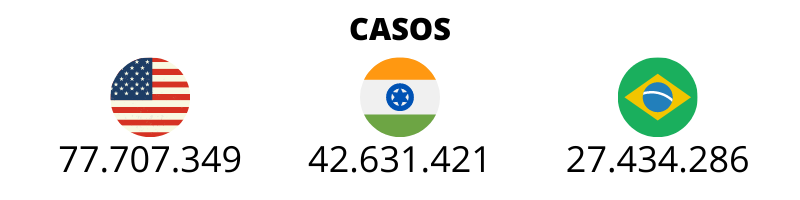

Progresso de contaminação por países:

In [42]:
#Dataframe para analise de casos por países para o chart race
paises_casos = df.pivot(index = 'date', columns = 'location', values = 'total_cases')

#Remove a entreda sobre dados mundiais
paises_casos = paises_casos.drop(['World'], axis = 1)

In [ ]:
# Plot Chart race
bcr.bar_chart_race(
    df=paises_casos, # selecionando os dados
    filename=None, # nomeando o arquivo
    orientation='h', # orientação do gráfico
    sort='desc', # organização 
    n_bars=10, # número de barras
    fixed_order=False, # ordem fixa
    fixed_max=True, # máximo fixo
    steps_per_period=10, # stepos por período
    interpolate_period=False, # interpolar o período
    label_bars=True, # colocar labels nas barras
    bar_size=.95, # tamanho da barra
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'}, # labels dos períodos
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total de casos: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'}, # resumo do período
    perpendicular_bar_func='median', # função da barra perpendicular
    period_length=90,# tamanho do período
    figsize=(5, 3), # tamanho da período
    dpi=144, 
    cmap='dark12', # esquema de cores
    
    title='COVID-19 Casos por país', # título
    title_size='', # tamanho do título
    bar_label_size=7, # tamanho do label das barras
    tick_label_size=7, # tamanho do tick do label
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'}, # definindo a fonte
    scale='linear', # escala dos dados
    writer=None, # escrever no plot
    fig=None, # definir a figura
    bar_kwargs={'alpha': .7}, # kwargs
    filter_column_colors=False)  # filtrar cores das colunas

####Mortes de COVID-19
Os 3 países com mais mortes são:

| País | Mortes | População |
| :-: | :-: | :-: |
| Estados Unidos | 919.255 | 332.915.074 |
| Brasil | 638.346 | 213.993.441 |
| Índia | 508.665 | 1.393.409.033 |

In [ ]:
# Países com mais mortes
df.loc[df.date == df.date.max(), ['location', 'total_deaths', 'population']].sort_values(by = "total_deaths", ascending = False)[1:10]

2.png

####Vacinas aplicadas
Os 3 países com mais vacinas aplicadas são:

| País | Vacinas | População |
| :-: | :-: | :-: |
| Índia | 1.723.371.281 | 1.393.409.033 |
| Estados Unidos | 546.624.663 | 332.915.074 |
| Brasil | 377.626.315 | 213.993.441 |

In [ ]:
# Países com mais vacinas
df.loc[df.date == df.date.max(), ['location', 'total_vaccinations', 'population']].sort_values(by = "total_vaccinations", ascending = False)[1:10]

4.png

##COVID-19 no Brasil

###Casos no Brasil

O primeiro caso no Brasil foi registrado no dia 26/02/2020 em São Paulo. O homem de 61 anos deu entrada no Hospital Israelita Albert Einstein, com histórico de viagem para Itália, região da Lombardia.

In [ ]:
#DataFrame apenas com o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

In [ ]:
#Identificaçãso do primeiro caso
df_brasil.loc[df_brasil['new_cases'] > 0.0].head(1)


###Mortes no Brasil

O primeiro registro de óbito no Brasil está registrado no dia 17/03/2020. Foi em São Paulo, um homem de 62 anos.

[O Ministério da Saúde informou que a primeira morte por covid-19 no Brasil aconteceu no dia 12/03/2020](https://agenciabrasil.ebc.com.br/saude/noticia/2020-06/primeira-morte-por-covid-19-no-brasil-aconteceu-em-12-de-marco), em São Paulo. O óbito foi confirmado por exames laboratoriais, dias após o óbito.


In [ ]:
# identificaçãso da primeira morte
df_brasil.loc[df_brasil['new_deaths'] > 0.0].head(1)

In [48]:
#Porcentagem da população que recebeu pelo menos uma dose
(df_brasil.total_deaths.max()/df_brasil.population.max()) * 100

0.29830166617116083

###Progresso

No dia 08/08/2020, o Brasil ultrapassou o número de 100.000 mortos e no dia 19/06/2021 ultrapassou o número de 500.000 mortos.

Em 15 meses, a COVID-19 causou a morte de 500.000 pessoas no Brasil. Nesse mesmo período, 17.889.167 brasileiros foram infectados e 88.108.418 vacinas foram aplicadas.

In [ ]:
# 100 mil mortos
df_brasil.loc[df_brasil['total_deaths'] > 100000.0].head(1)

In [ ]:
# 500 mil mortos
df_brasil.loc[df_brasil['total_deaths'] > 500000.0].head(1)

In [51]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,8))

x = df_brasil.date

total_mortes_br = df.loc[df.location == "Brazil", "total_deaths"]
total_casos_br = df.loc[df.location == "Brazil", "total_cases"]
total_vacinados_br = df.loc[df.location == "Brazil", "total_vaccinations"]

# gráfico 1

ax[0].plot(x, total_mortes_br, color='#8EC646')

ax[0].grid(linestyle=':', linewidth=0.25)

ax[0].set_title("Linear")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[0].set_title("COVID-19 \n Mortes no Brasil")
ax[0].set_ylabel("Mortes")
ax[0].set_xlabel("Data")

#Personaliza o ytick
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(format_tick))

# gráfico 2
ax[1].plot(x, total_casos_br, color='#8EC646')

ax[1].grid(linestyle=':', linewidth=0.25)

ax[1].set_xlabel("x")
ax[1].set_ylabel("y")

ax[1].set_title("COVID-19 \n Casos no Brasil")
ax[1].set_ylabel("Casos")
ax[1].set_xlabel("Data")

#Personaliza o ytick
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(format_tick))

# gráfico 3
ax[2].plot(x, total_vacinados_br, color='#8EC646')

ax[2].grid(linestyle=':', linewidth=0.25)

ax[2].set_xlabel("x")
ax[2].set_ylabel("y")

ax[2].set_title("COVID-19 \n Vacinas no Brasil")
ax[2].set_ylabel("Vacinas")
ax[2].set_xlabel("Data")

#Personaliza o ytick
ax[2].yaxis.set_major_formatter(tick.FuncFormatter(format_tick))

fig.tight_layout();

###Vacinas no Brasil

Os primeiros registros de vacinação no Brasil foram no dia 17/01/2021. Uma enfermeira de São Paulo foi a primeira imunizada no Brasil.

Até o dia 12/02/2022, 81,3% da população brasileiro havia recebido pelo menos uma dose da vacina.

A OMS estabeleceu a meta de 40% da população vacinada em 2021 e 70% até o primeiro semestre de 2022.

O Brasil já cumpriu a meta para 2022.

No gráfico de vacinas há duas ocorrências de ausencias de dados.
O primeiro caso foi um ataque cibernético ao sistema do SUS, no segundo foi uma falha técnica.

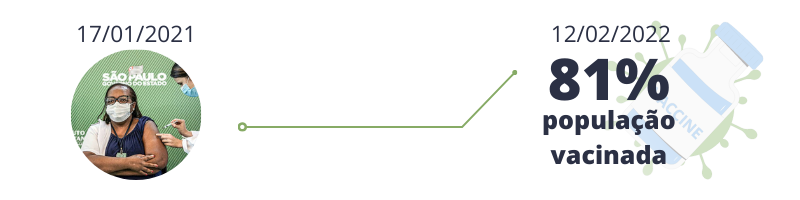

In [52]:
#Porcentagem da população que recebeu pelo menos uma dose
(df_brasil.people_vaccinated.max()/df_brasil.population.max()) * 100

81.3659167245224

In [53]:
# Primeiras vacinas
df_brasil.loc[df_brasil['total_vaccinations'] > 0.0].head(1)

iso_code location  ...   population  median_age
20999      BRA   Brazil  ...  213993441.0        33.5

[1 rows x 35 columns]

Após o início da vacinação no Brasil, o número de óbitos reduziu rapidamente.

Text(0, 0.5, 'Média móvel')

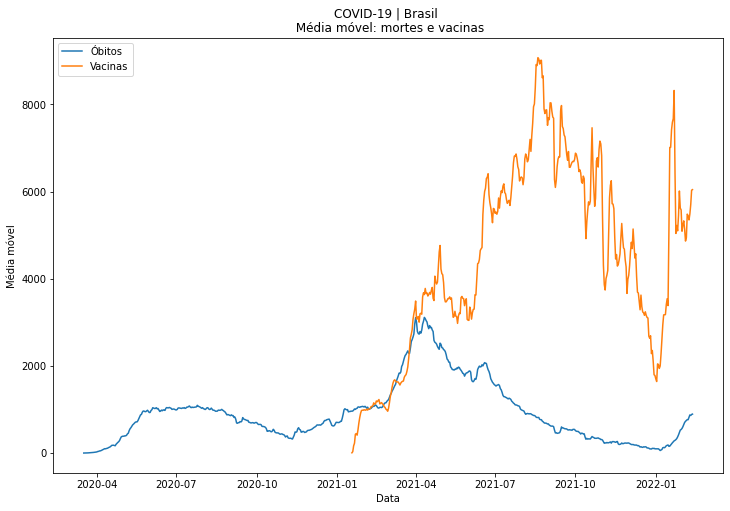

In [60]:
fig, ax = plt.subplots(figsize=(12,8))

x = df_brasil.date

vacinados_br = df.loc[df.location == "Brazil", "new_vaccinations_smoothed_per_million"]
mortes_br = df.loc[df.location == "Brazil", "new_deaths_smoothed"]


ax.plot(x, mortes_br, label='Óbitos')
ax.plot(x, vacinados_br, label='Vacinas')

leg = ax.legend(loc='upper left')

ax.set_title("COVID-19 | Brasil \n Média móvel: mortes e vacinas")
ax.set_xlabel("Data")
ax.set_ylabel("Média móvel")

#Conclusões

Entre os países analisados, o Brasil é o 2º colocado com mais mortes causadas pela COVID-19 e o 3º colocado em aplicação de vacinas, mesmo não possuindo fabricação própria. Os primeiros  colocados (EUA e Índia) possuem fabricação própria de vacinas.

No Brasil, após o início das vacinações a quantidade de mortes causadas por COVID-19 reduziram drasticamente.
O Brasil já alcançou a meta de vacinação prevista pela OMS para o primeiro semestre de 2022.
